In [44]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import cv2
import numpy as np
import torch
import torch.nn as nn
import os
import sys
sys.path.append("../")

from vision.ssd.vgg_ssd import create_vgg_ssd
from vision.ssd.vgg_ssd import create_vgg_ssd_complement_with_fractional, create_vgg_ssd_predictor
from vision.ssd.config.vgg_ssd_config import Config, Config_complement_with_fractional

anchors = [1,1,1]
num_anchors = [4,6,6,6,4,4]
vgg_config=[64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'C', 512, 512, 512, 'M', 512, 512, 512]
rectangles = [[2],[2,3],[2,3],[2,3],[2],[2]]
# cfg = Config(anchors=anchors, rectangles=rectangles, num_anchors=num_anchors, vgg_config=vgg_config, pretrained=None) # --- custom
cfg = Config_complement_with_fractional(anchors=anchors, rectangles=rectangles, num_anchors=num_anchors, vgg_config=vgg_config, pretrained=None) # --- custom


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
net = create_vgg_ssd_complement_with_fractional(num_classes=21, config=cfg, is_test=True)
predictor = create_vgg_ssd_predictor(net, nms_method="hard", device=torch.device("cuda:0"), config=cfg)

vgg_config: basic.
similar class in SSD


In [46]:
net.cuda()
image = cv2.cvtColor(cv2.imread("../../yolov3_act2/data/samples/field.jpg"), cv2.COLOR_BGR2RGB)
out = predictor.predict(image, prob_threshold=0.5)

Inference time:  0.0050296783447265625


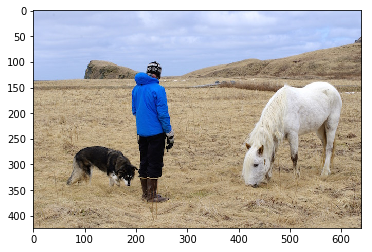

In [47]:
plt.imshow(image)

In [51]:
cfg.priors, 13624/8762

(tensor([[0.0133, 0.0133, 0.1000, 0.1000],
         [0.0133, 0.0133, 0.1414, 0.1414],
         [0.0133, 0.0133, 0.1414, 0.0707],
         ...,
         [0.5000, 0.5000, 0.9612, 0.9612],
         [0.5000, 0.5000, 1.0000, 0.6223],
         [0.5000, 0.5000, 0.6223, 1.0000]]), 1.5548961424332344)